In [ ]:
!pip3 install plotly

In [3]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')


In [6]:
import os
print(os.getcwd())


/Users/yanfeiwang/Desktop2/python


In [4]:
world = pd.read_csv("/Users/yanfeiwang/Desktop2/python/input_shee/countries of the world.csv")
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [5]:
world.columns = (["country","region","population","area","density","coastline","migration","infant_mortality","gdp","literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry","service"])

In [6]:
world.country = world.country.astype('category')
world.country = world.country.str.replace('&','and')

world.region = world.region.astype('category')
world.density = world.density.str.replace(",",".").astype(float)
world.coastline = world.coastline.str.replace(",",".").astype(float)
world.migration = world.migration.str.replace(",",".").astype(float)
world.infant_mortality = world.infant_mortality.str.replace(",",".").astype(float)
world.literacy = world.literacy.str.replace(",",".").astype(float)
world.phones = world.phones.str.replace(",",".").astype(float)
world.arable = world.arable.str.replace(",",".").astype(float)
world.crops = world.crops.str.replace(",",".").astype(float)
world.other = world.other.str.replace(",",".").astype(float)
world.climate = world.climate.str.replace(",",".").astype(float)
world.birthrate = world.birthrate.str.replace(",",".").astype(float)
world.deathrate = world.deathrate.str.replace(",",".").astype(float)
world.agriculture = world.agriculture.str.replace(",",".").astype(float)
world.industry = world.industry.str.replace(",",".").astype(float)
world.service = world.service.str.replace(",",".").astype(float)

In [7]:
world.to_csv('/Users/yanfeiwang/Desktop2/python/input_shee/world.csv', index=False)

In [8]:
world.describe()

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [9]:
missing = world.isnull().sum()
missing

country              0
region               0
population           0
area                 0
density              0
coastline            0
migration            3
infant_mortality     3
gdp                  1
literacy            18
phones               4
arable               2
crops                2
other                2
climate             22
birthrate            3
deathrate            4
agriculture         15
industry            16
service             15
dtype: int64

In [11]:
world.fillna(world.mean(),inplace=True)

In [12]:
world.region = world.region.str.strip()

In [13]:
group = world.groupby("region")
group.mean()

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
region,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,1264.825000,17.926786,1.372500,41.780000,8053.571429,79.553571,173.477194,15.874643,3.848929,80.276429,1.969251,21.157857,7.637143,0.177643,0.302143,0.520107
BALTICS,2.394991e+06,5.833833e+04,39.833333,3.116667,-2.033333,8.103333,11300.000000,99.733333,292.866667,30.310000,0.610000,69.080000,2.713008,9.343333,12.630000,0.045000,0.293333,0.661667
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,56.708333,0.093333,-2.033333,44.410000,4000.000000,98.725000,163.850000,19.454167,2.022500,78.523333,2.481504,17.855833,10.341667,0.192000,0.328000,0.480167
EASTERN EUROPE,9.992893e+06,9.601850e+04,100.900000,1.035000,-0.647500,12.686667,9808.333333,93.526236,280.750000,30.982500,2.430833,66.587500,2.868089,11.349561,10.197612,0.092167,0.309250,0.598667
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,136.202222,15.972222,-1.494444,20.092667,8682.222222,90.480851,270.870254,10.790889,4.913556,84.295778,2.033333,19.081111,6.376000,0.093682,0.257298,0.646924
NEAR EAST,1.219177e+07,2.722241e+05,427.081250,3.602500,2.650000,23.377500,10456.250000,79.936035,210.797590,10.553750,5.105625,84.333125,1.696189,25.031875,4.809375,0.063812,0.406000,0.530000
NORTHERN AFRICA,2.690119e+07,1.003148e+06,38.933333,0.318333,-0.353646,31.681161,6164.970501,69.839713,122.843572,7.435000,2.805000,89.760000,1.713008,21.030789,5.545224,0.137641,0.402285,0.432000
NORTHERN AMERICA,6.633446e+07,4.356494e+06,260.860000,49.640000,-0.274000,8.628000,26100.000000,94.767656,686.740000,11.426000,0.048000,88.526000,2.055610,13.154000,7.694000,0.068738,0.232684,0.698313
OCEANIA,1.577698e+06,4.057053e+05,131.180952,107.885714,-1.860655,21.661139,8247.619048,87.693005,189.885714,7.667143,14.719524,77.613333,2.000000,22.108321,6.137271,0.169344,0.231312,0.598544


Text(0.5, 1.0, 'Number of Countries by REGİON')

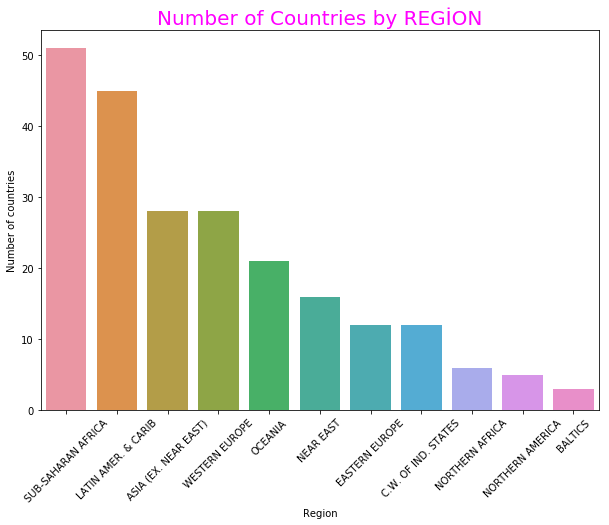

In [18]:

region = world.region.value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=region.index,y=region.values)
plt.xticks(rotation=45)
plt.ylabel('Number of countries')
plt.xlabel('Region')
plt.title('Number of Countries by REGİON',color = 'magenta',fontsize=20)

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax